#  <center> PROYECTO DETECCIÓN DE FICHAS DE AJEDREZ </center>

# <center>MOTIVACIÓN</center>

Dentro de los proyectos ofrecidos para  el desarrollo del trabajo final de la asignatura visión artificial, decidimos escoger el proyecto de detección de fichas de ajedrez porque lo consideramos como una forma muy didactica de divulgar la información y conocimientos adquiridos durante el desarrollo del curso sin dejar de lado los conocimeintos aritmeticos e informáticos que este conlleva.

# <center>PREGUNTAS</center>

<ul><li>¿Es posible separar una ficha negra del tablero?</li><br><li>¿Es posible separar varias fichas negras del tablero?</li><br><li>¿Es posible separar una ficha blanca del tablero?</li><br><li>¿Es posible separar varias fichas blancas del tablero?</li></ul>

# <center>DATASET A UTILIZAR</center>

In [ ]:
!curl -L "https://public.roboflow.com/ds/NqmkZZmjgW?key=AZai2684q8" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

<br>
El dataset que se utilizo para este proyecto fue el de <b> Chess Pieces Dataset </b> el cual se encuentra en la pagina web de <b> Roboflow. </b>Este cuenta con un total de 693 imagenes a utilizar, por lo que se repasaron muchas de esas imagenes y se seleccionaron únicamente 17 para trabajar en este proyecto.
<br><br><br>
<center><i>Imagenes utilizadas</i></center>
<br><br>
<div style="display: flex;">
<img src="res/fn/img1.jpg" style="height:150px;"></img>
<img src="res/fn/img2.jpg" style="height:150px;"></img>
<img src="res/fn/img3.jpg" style="height:150px;"></img>
<img src="res/fn/img4.jpg" style="height:150px;"></img>
</div>

<div style="display: flex;">
<img src="res/fn/img5.jpg" style="height:150px;"></img>
<img src="res/fn/img6.jpg" style="height:150px;"></img>
<img src="res/fn/img7.jpg" style="height:150px;"></img>
<img src="res/fn/img8.jpg" style="height:150px;"></img>
</div>

<div style="display: flex;">
<img src="res/fn/img9.jpg" style="height:150px;"></img>
<img src="res/fb/img1.jpg" style="height:150px;"></img>
<img src="res/fb/img2.jpg" style="height:150px;"></img>
<img src="res/fb/img3.jpg" style="height:150px;"></img>
</div>

<div style="display: flex;">
<img src="res/fb/img4.jpg" style="height:150px;"></img>
<img src="res/fb/img5.jpg" style="height:150px;"></img>
<img src="res/fb/img6.jpg" style="height:150px;"></img>
<img src="res/fb/img7.jpg" style="height:150px;"></img>
</div>

<center><img src="res/fb/img8.jpg" style="height:150px;"></img></center>

# <center>METODOLOGIA - FICHA NEGRA (ÚNICA)</center>

## <ul><li>Analizamos el problema</li></ul>

Al momento de pensar el cómo segmentar una ficha negra se púdo identificar que esta pieza en particular tiene un color muy caracterisco que la diferencia tanto del fondo como de las demás fichas, lo cual corresponde a este color negro la cual las hace resaltar muy facilmente de la imagen, por lo que se decidio aplicar la imagen a escala de grises e identicar en que valores de intensidad se encontraba esta.

<br>
<img src="res/etapa1.png"/>
<br><br>

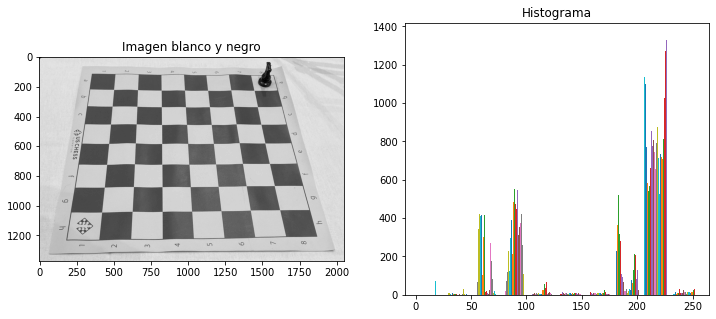

In [157]:
%matplotlib inline 
from skimage import io, color
import numpy as np
import cv2
import matplotlib.pyplot as plt
import warnings
import skimage
import skimage.io
import skimage.data
import skimage.morphology as morph
warnings.filterwarnings('ignore')

#Función de lectura rápida de imágenes a color y en escala de grises
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None


img1_gray = img_read('res/fn/img1.jpg',"gray").astype(np.uint8)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen blanco y negro')
ax[0].imshow(img1_gray, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img1_gray);

<b>NOTA:</b> Para este caso en especifico de segmentar una ficha negra del tablero de ajedrez, no se tuvo la necesidad de hacerle un preprocesamiento a la imagen ya que el dataset al que se recurrio nos brindo las imagenes en una calidad optima de acuerdo al proceso que se va a realizar, porque si se observa detenidamente las imagenes seleccionadas no tienen un factor que nos impida realizar la idea que se tiene para resolver este problema, factores como la iluminación la cual es optima en estas imagenes, algún tipo de ruido el cual no esta presente, que la imagen se vea borrosa lo que no pasa con estas imagenes, o cualquier otro tipo de situación que complique la tecnicas de visión artificial que se van a usar.
<br><br>

## <ul><li>Segmentación por umbralización (Thresholding)</li></ul>

Teniendo esto en cuenta, al notar que la ficha negra se diferencia mucho del fondo, se quizo utilizar la técnica conocida como <b>segmentación por umbralización</b> o también conocida como <b>thresholding.</b> Esta técnica de visión artificial puede convertir una imagen de niveles de gris en una imagen binaria y asume que hay un solo objeto (o varios objetos con las mismas características) sobre un fondo uniforme <b>(ficha negra).</b>

<br><br>

<img src="res/etapa3.png"/>

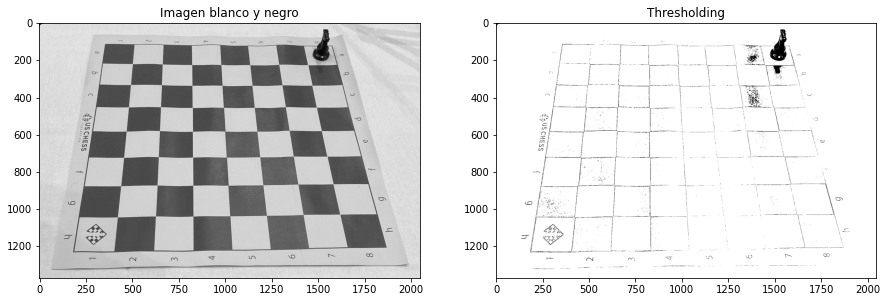

In [158]:
#Tomar solamente los valores de la imagen mayores a 70
thresholded = img1_gray > 70
#Mostrar la nueva imagen
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.set_title('Imagen blanco y negro')
ax1.imshow(img1_gray, cmap='gray')
ax2.set_title('Thresholding')
ax2.imshow(thresholded, cmap='gray')

## <ul><li>Relleno de huecos</li></ul>

Luego de utilizar la técnica de thresholding se puede evidenciar que la ficha negra se separo muy bien del entorno, pero trajo otros elementos que en la escala de intensidad son muy similares a esta ficha, y como el objetivo es tener unicamente la ficha negra que en este caso es el caballo, se va a utilizar una técnica denominada como <b>relleno de huecos</b> o <b>relleno de regiones</b> que en resumidas cuentas, rellena de blanco los pequeños espacios negros que tiene la imagen, por lo que el caballo no se vera tan afectado ya que tiene más cantidad de negro.
<br><br>

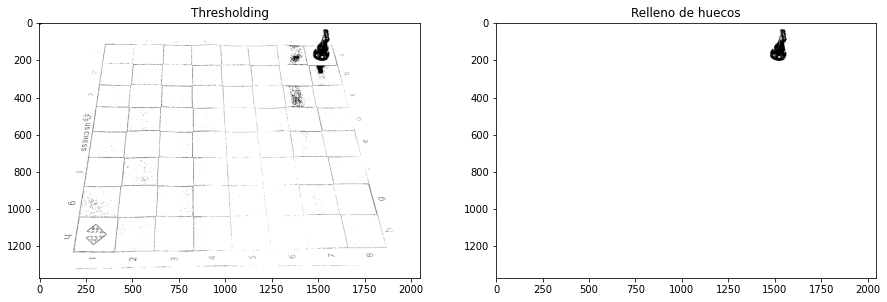

In [138]:
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 8))
ax1.set_title('Thresholding')
ax1.imshow(thresholded, cmap='gray')
ax2.set_title('Relleno de huecos')
ax2.imshow(filled, cmap='gray')

## <ul><li>Erosión</li></ul>

Déspues de realizar el relleno de huecos se puede ver que la ficha negra quedo bastante bien segmentada, por lo que este último paso que se va hacer a continuación diria que es <b>opcional</b>, porque lo que se quiere hacer principalmente es que los pequeños espacios de blanco que tiene en este caso el caballo desaparezcan de este, por lo que se van a dar los ultimos retoques con la técnica conocida como <b>erosión</b> la cual el principal efecto del operador morfológico sobre una imagen binaria es encoger o erosionar los bordes de las regiones claras, haciendo de esta forma que los huecos y cavidades en la imagen binaria se agranden.
<br><br>

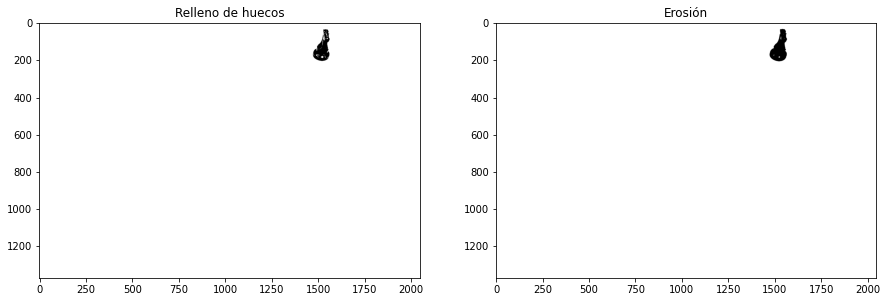

In [139]:
elem = morph.disk(2)

erosion = morph.binary_erosion(filled,elem)

fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Relleno de huecos')
ax[0].imshow(filled, cmap='gray')
ax[1].set_title('Erosión')
ax[1].imshow(erosion, cmap='gray')

## <ul><li>Aplicación en otras imagenes con el mismo objetivo</li></ul>

Como el resultado para la primera imagen fueron sactisfactorios, se espera que como las demás imagenes que contiene fichas negras tiene las mismas caracteristicas, entonces simplemente seria repetir el mismo proceso anteriormente dicho para llegar al mismo objetivo, sin necesidad de agregar un paso de más ni la de quitar alguno, y solo en caso de ser necesario se modificaran algunos valores de los procesos anteriormente hechos ya que cada imagen tiene sus respectivas intensidades.
<br><br>

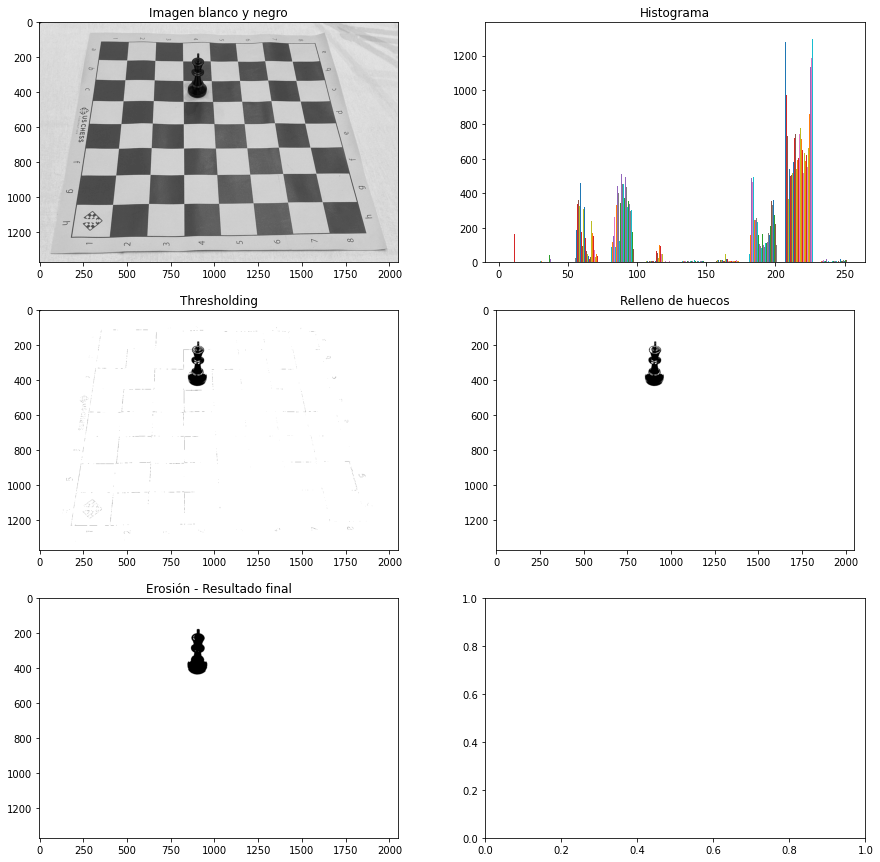

In [159]:
#Leer imagen de entrada 
img2_gray = img_read('res/fn/img2.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 50
thresholded = img2_gray > 50

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(3)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img2_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img2_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

# <center>METODOLOGIA - FICHA NEGRA (VARIAS)</center>

Al momento de separar varias fichas negras del entorno se puede deducir que estas poseen las <b>mismas caracteristicas</b> como si se tratara de segmentar únicamente una sola ficha negra, ya que sigue de predominante esa intensidad que tiene el color negro en la imagen, por lo que se puede seguir la misma linea de pasos que se hicieron en el momento de segmentar solo una y con las mismas condiciones <b>(sin necesidad de aplicar preprocesamiento)</b>

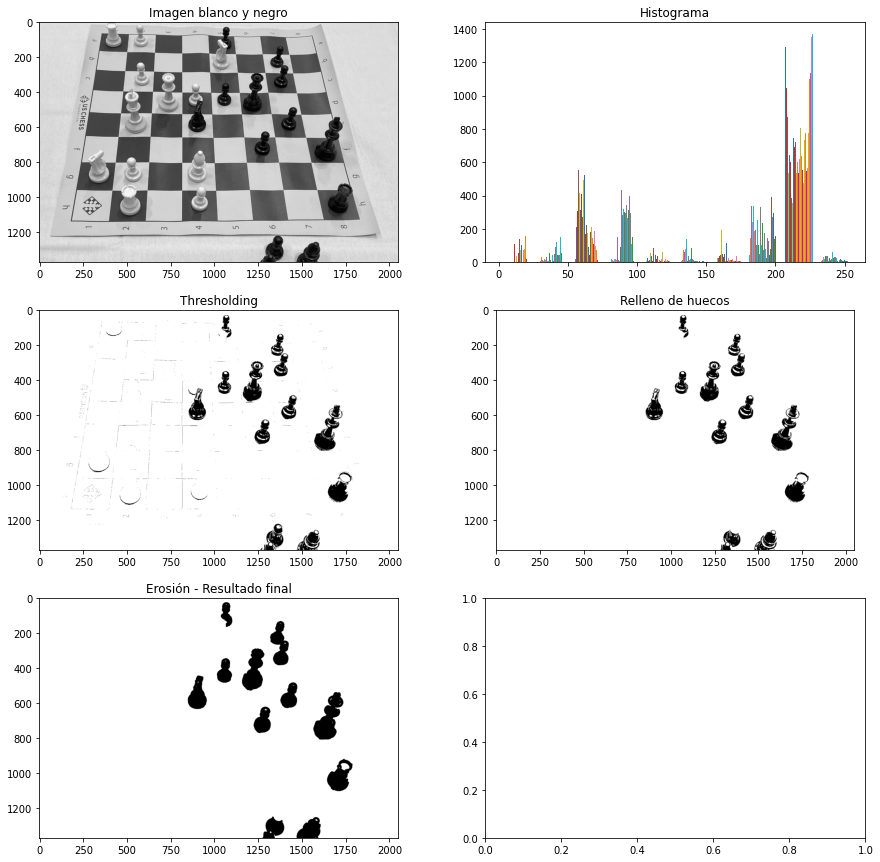

In [206]:
#Leer imagen de entrada 
img3_gray = img_read('res/fn/img4.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 40
thresholded = img3_gray > 40

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(5)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img3_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img3_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

# <center>METODOLOGIA - FICHA BLANCA (ÚNICA)</center>

## <ul><li>Analizamos el problema</li></ul>

Al momento de buscar un proceso para intentar segmenta la ficha blanca, se intento analizar de igual forma la escala de grises de la imagen e intentar realizar un <b>thresholding</b> nuevamente por si de alguna se podia sementar un poco la ficha blanca de su entorno.

<br>
<img src="res/etapa1.png"/>
<br><br>

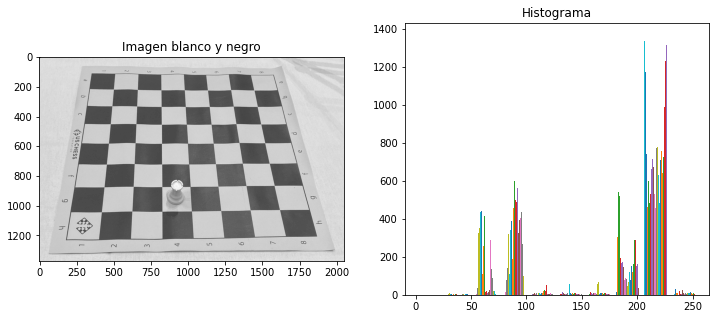

In [165]:
img1_gray = img_read('res/fb/img1.jpg',"gray").astype(np.uint8)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen blanco y negro')
ax[0].imshow(img1_gray, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img1_gray);

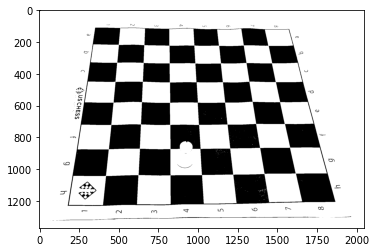

In [166]:
thresholded = img1_gray > 110
plt.imshow(thresholded, cmap="gray")

Con este resultado se pudo deducir que por medio de la escala RGB y por la técnica aplicada anteriormente de thresholding iba ser imposible la segmentación de esta ficha, ya que justamente se encontraba encima de una casilla que tenia la misma intensidad de blanco, por lo que se intento repasar los otros modelos de color por si se encontraba alguna diferencia.

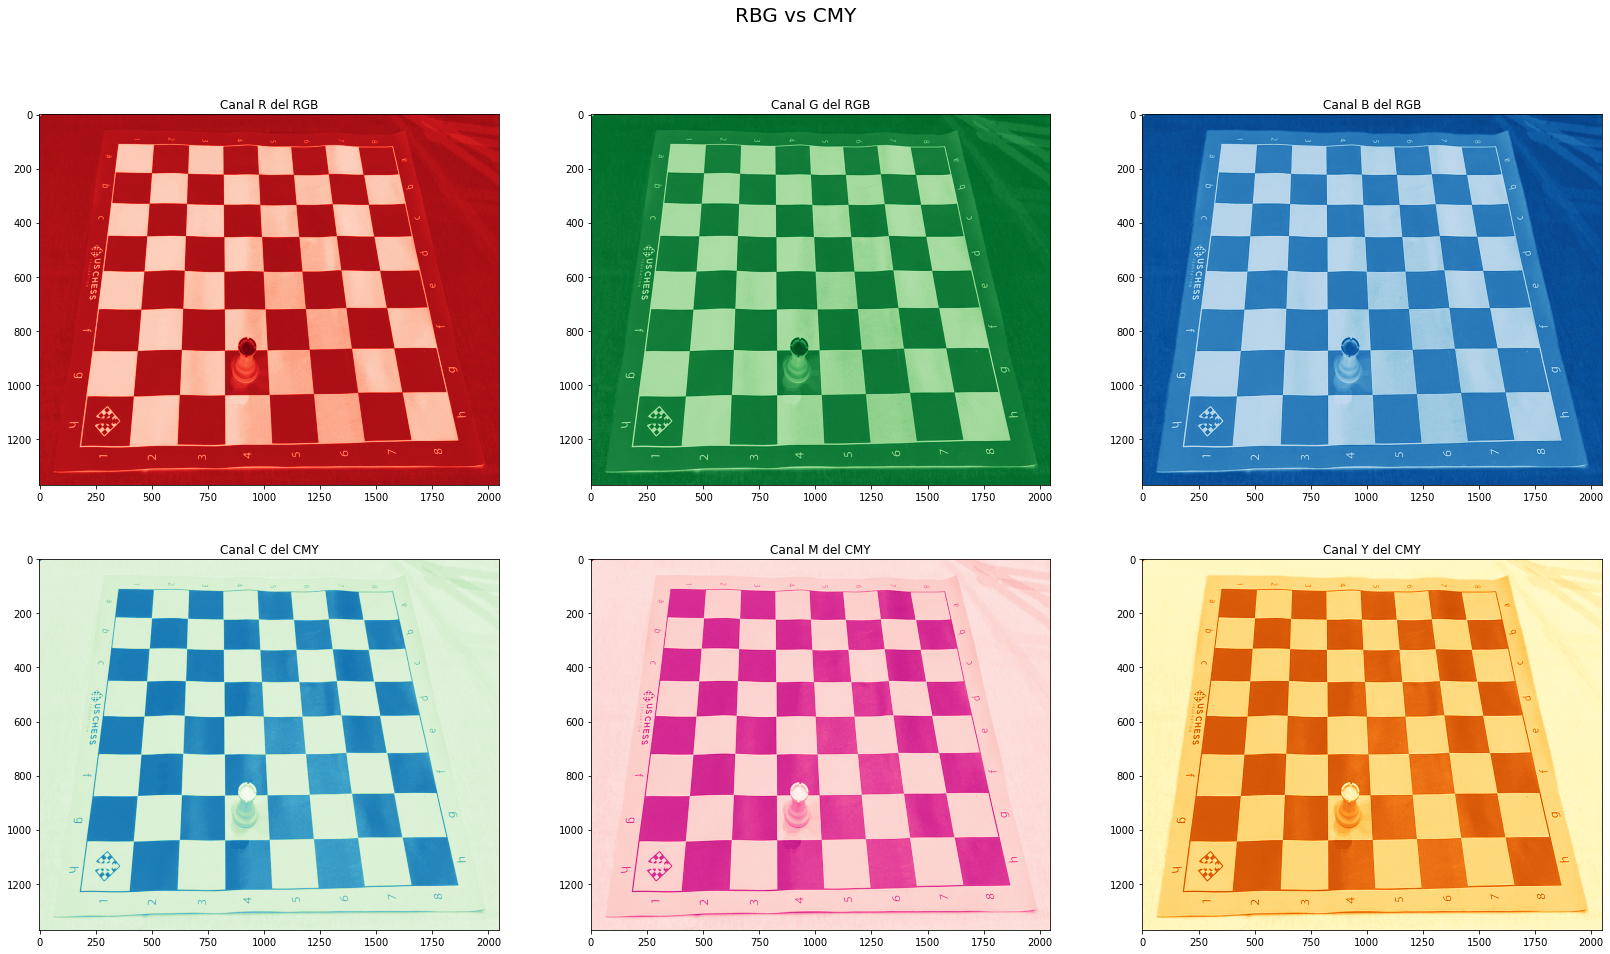

In [168]:
img_rgb = img_read('res/fb/img1.jpg',"color").astype(np.uint8)

#Aquí se descompone cada canal de la imagen
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
img_C = 255 - img_rgb[:,:,0]
img_M = 255 - img_rgb[:,:,1]
img_Y = 255 - img_rgb[:,:,2]

#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(img_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(img_M, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(img_Y, cmap='YlOrBr', aspect='auto')

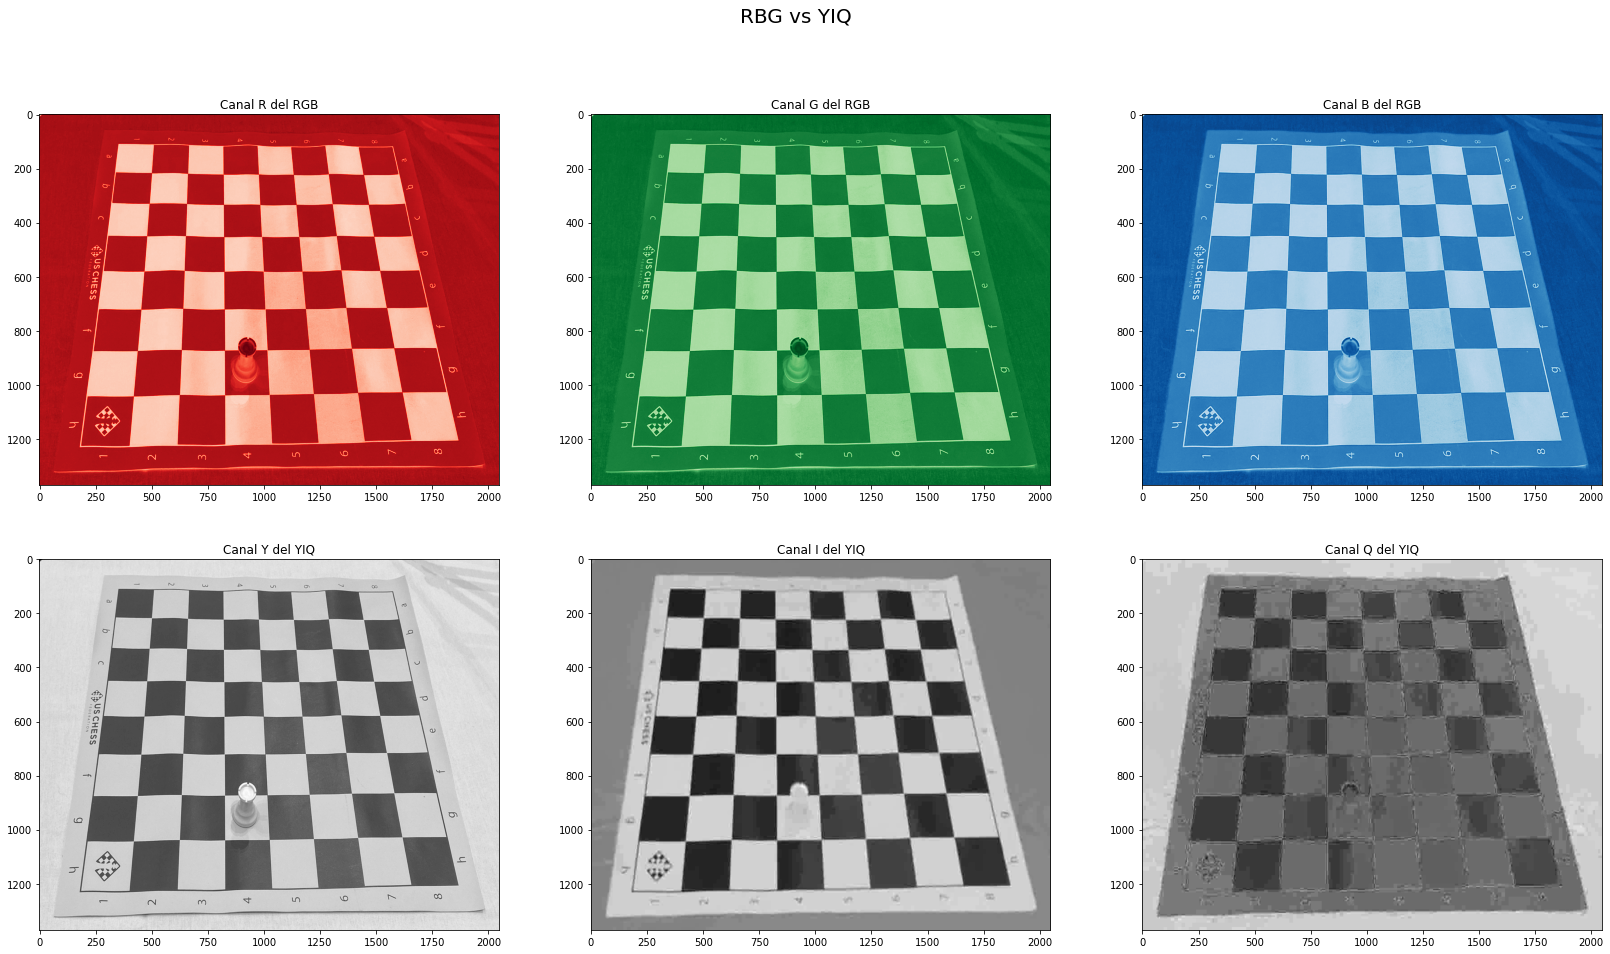

In [169]:
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtienen los canales YIQ mediante una transformación lineal
img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(img_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(img_Q, cmap='gray', aspect='auto')

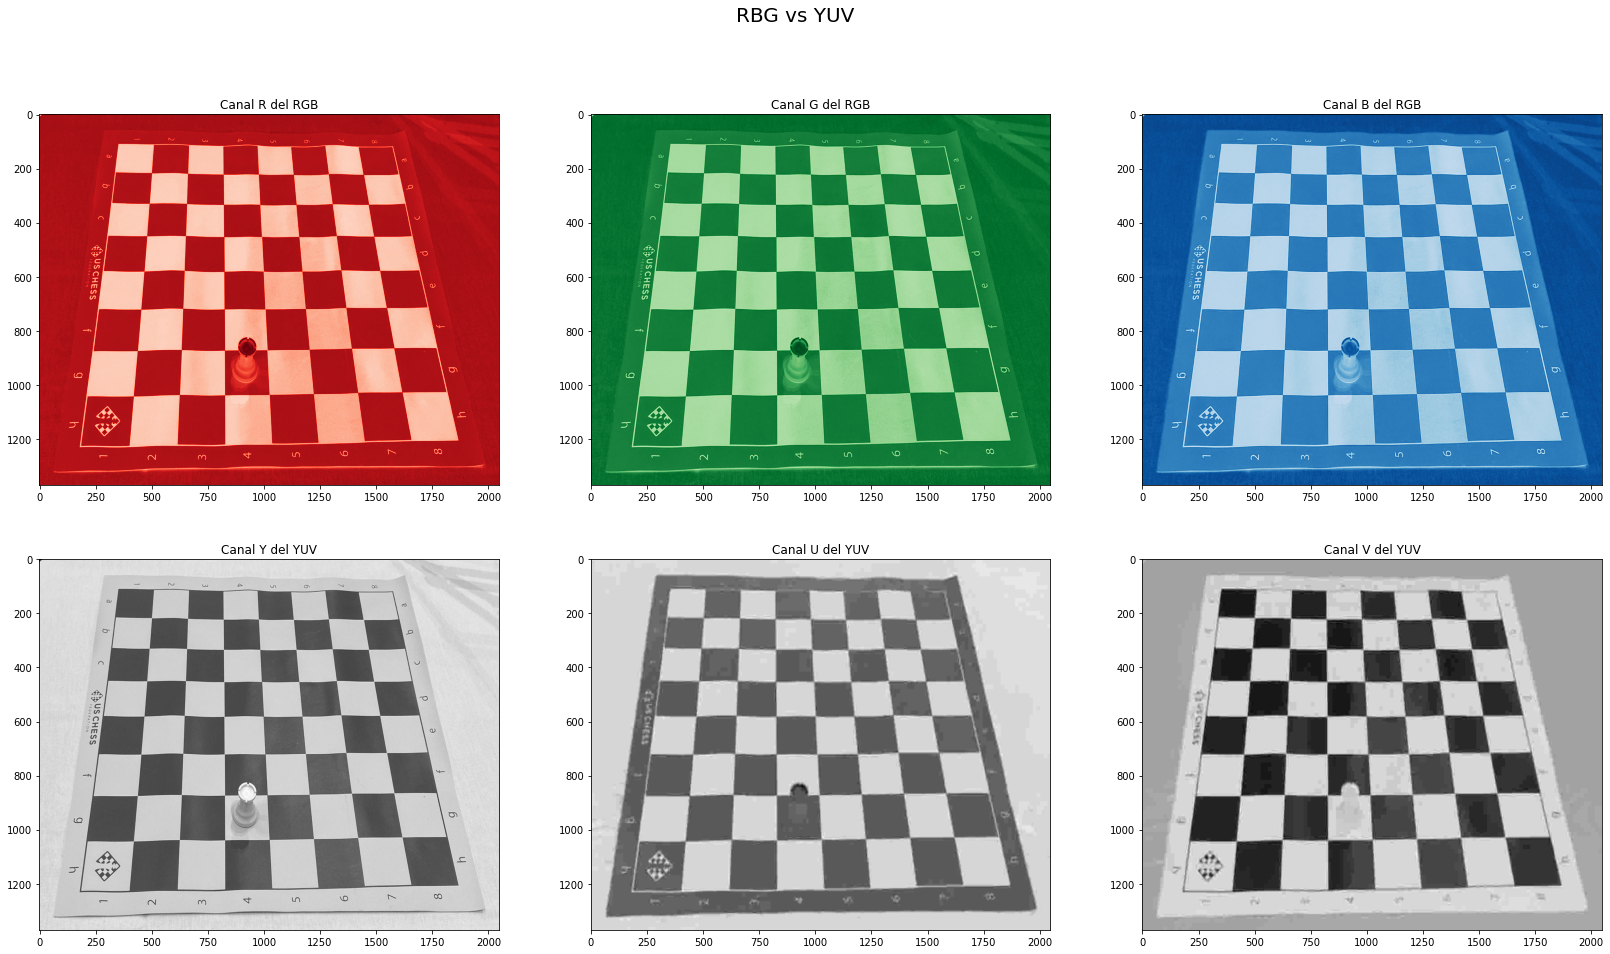

In [170]:
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Separar el espacio de color YUV en sus canales individuales
img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YUV', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YUV')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal U del YUV')
ax5.imshow(img_U, cmap='gray', aspect='auto')
ax6.set_title('Canal V del YUV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

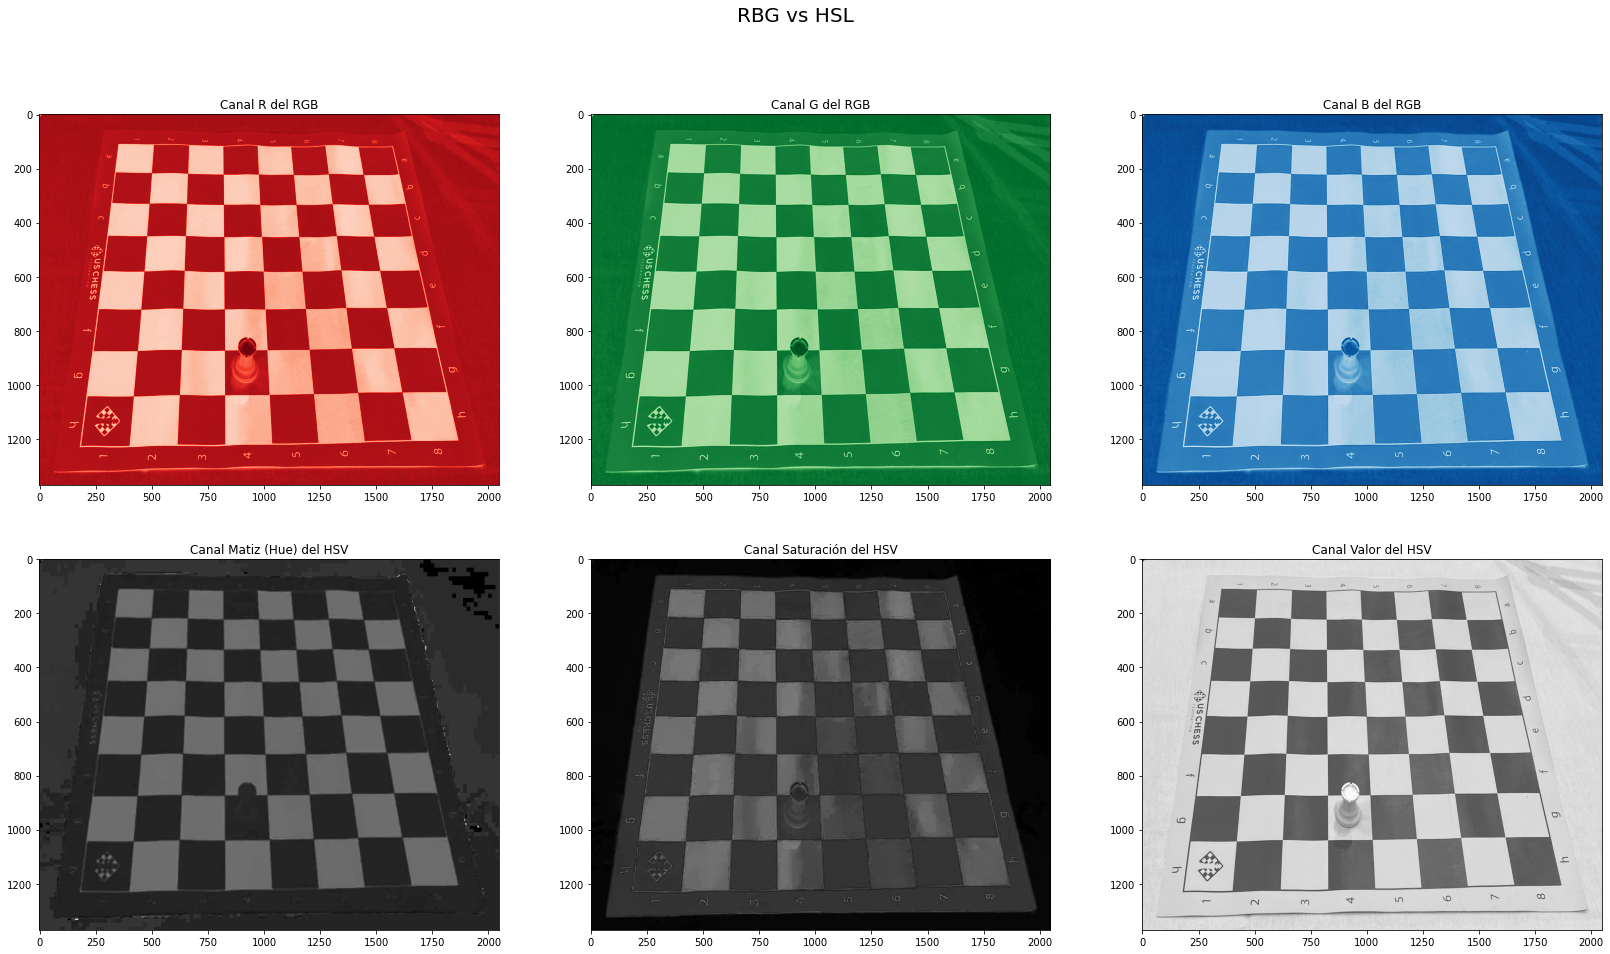

In [174]:
#Leer imagen del alce
img = cv2.imread("res/fb/img1.jpg", cv2.IMREAD_COLOR)
#Convertir a RGB e imprimir
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Leer cada canal del espacio RGB de la imagen
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Conversión automática con la función cv2.cvtColor al canal HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_H, cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_S, cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_V, cmap='gray', aspect='auto')


## <ul><li>Filtro de Canny</li></ul>

Después de analizar cada modelo de color y no encontrar una diferencia tan significante como para intentar segmentar la imagen, se elige un nuevo camino en el cual se va a necesitar los bordes de la ficha blanco, por lo que se utiliza la técnica del <b>Canny</b> el cual es un algoritmo que se fundamenta en la teoría de los operadores de primera derivada y resulta particularmente interesante porque extrae bordes y cierra los contornos evitando las rupturas de los bordes durante su extracción.
<br><br>

<img src="res/etapa3.png"/>

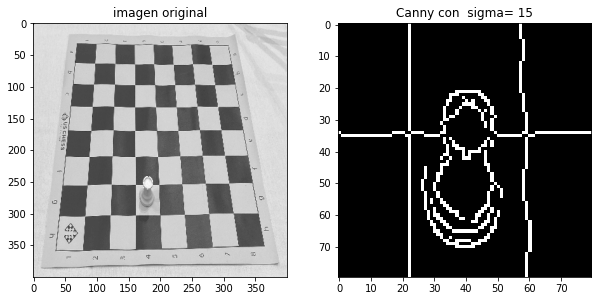

In [175]:
img = img_read('res/fb/img1.jpg', "gray")
#Leer imagen de entrada, darle tamaño 400x400 y recortarla entre 100 y 300
img1 = cv2.resize(img, (400,400))
img = img1[220:300,140:220].astype(np.uint8)

#Definir el sigma
sigma = 15

#Suavizamos la imagen para eliminar ruido (aplicar filtro Gaussiano)
result = cv2.GaussianBlur(img, (3,3), sigma)

#Aplicar el filtro de Canny como función de cv2 y darle límite entre 0 y 255
result = cv2.Canny(img, threshold1= 100, threshold2 = 180)

#Generar un subplot 1x2 que muestre imagen original y Canny
fig2, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img1, cmap='gray')
ax[1].set_title('Canny con  sigma= '+str(sigma))
ax[1].imshow(result, cmap='gray')

## <ul><li>Cierre</li></ul>

Luego de tener los bordes de la ficha blanca, se quiere quitar las cuadriculas de las casillas que estan a su alrededor, por lo que antes de aplicar cualquier técnica de vision para eliminarlas, debemos rellenar un poco la figura de la ficha para que no se pierda tanta información al momento de eliminar las casillas, por lo que se utiliza la técnica del cierre la cual fusiona las hendiduras finas y largas presentes en los objetos, elimina agujeros pequeños y rellena brechas en el contorno uniendo objetos cercanos.
<br><br>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


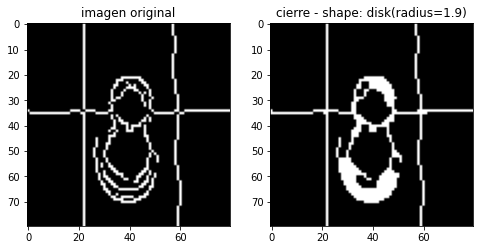

In [176]:
#Importar librerías
%matplotlib inline
from skimage import img_as_uint
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear máscara
radius = 1.9
selem = morph.disk(radius)

#Leer imagen de entrada y aplicar la operación cierre de skimage, cuyos parámetros
#requieren imagen de entrada y una máscara
cierre = morph.binary_closing(result,selem)

#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(result, cmap='gray')
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray')


io.imsave("res/pr.jpg", img_as_uint(cierre))

## <ul><li>Negativo de una imagen</li></ul>

Al momento de que la imagen ya tenga un relleno diferente a la original, se le quiere aplicar su respectivo <b>negativo a la imagen</b> para que posteriormente se pueda utilizar este negativo en <b>operaciones lógicas</b> comparada con el <b>canny</b> que se obtuvo anteriormente, y de esta forma evidenciar si las casillas de la imagen se pueden eliminar sin necesidad de borrar las ficha blanca de la imagen.
<br><br>

<img src="res/etapa2.png"/>

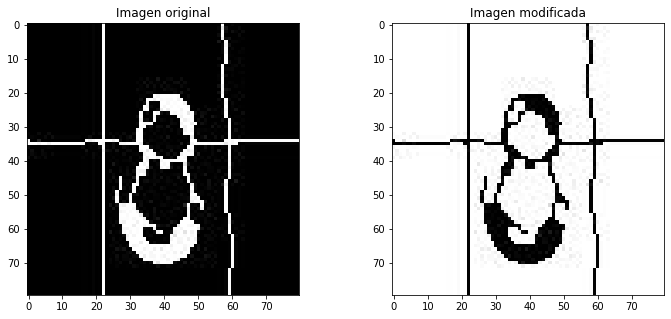

In [182]:
#Leer una imagen en escala de grises
img = cv2.imread('res/pr.jpg', cv2.IMREAD_GRAYSCALE)
#Crear la copia de la imagen
img_subtract= np.zeros(img.shape, np.uint8)
#El negativo de la imagen corresponde a restar de la matriz cuyas componentes son 255,
#la matriz de la imagen que cargamos
img_subtract = cv2.subtract(255, img)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('Imagen modificada')
ax[1].imshow(img_subtract, cmap="gray")

## <ul><li>Operadores lógicos (OR)</li></ul>

Y como se dijo anteriormente, depués de tener el <b>negativo de la imagen</b>, se va comparar con el <b>canny</b> que se obtuvo al principio por medio de un <b>operador lógico denominado</b> como <b>OR</b>, por lo que se obtuvo el siguiente resultado:
<br><br>

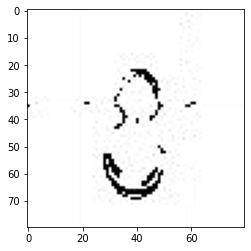

In [183]:
OR = cv2.bitwise_or(result,img_subtract)
plt.imshow(OR, cmap="gray")

## <ul><li>Apertura</li></ul>

Como se puede observar, se logro el objetivo de quitar los bordes de las casillas de la imagen pero en el proceso se perdio una gran parte de los bordes de la ficha por lo que se quiere intentar rellenar un poco, para ello vamos a utilizar la técnica de <b>apertura</b> 
<br><br>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


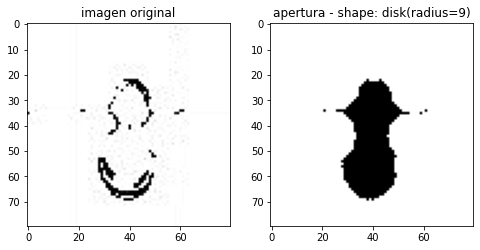

In [185]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Definir radio y crear una máscara
radius = 9

selem = morph.disk(radius)

#Leer imagen de entrada y realizar una apertura con la máscara creada bajo la función
#de skimage, los parámetros son los mismos que erosión y dilatación
apertura = morph.binary_opening(OR,selem)

#Crear subplot 1x2 que muestre imagen original y apertura 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(OR, cmap='gray')
ax2.set_title('apertura - shape: disk(radius='+str(radius)+')')
ax2.imshow(apertura, cmap='gray')

io.imsave("res/pr2.jpg", img_as_uint(apertura))

## <ul><li>Operadores lógicos (OR)</li></ul>

Al momento de reconstruir nuevamente la ficha blanca de ajedrez, se le da el ultimo retoque para que su forma en general se paresca lo más posible a los bordes del <b>canny</b> que teniamos inicialmente, por lo que se vuelve a comparar el <b>canny</b> y la técnica de <b>apertura</b> con el <b>operador lógico OR</b> y se obtiene este resultado final.
<br><br>

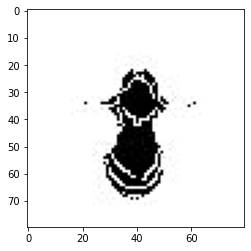

In [186]:
img = cv2.imread('res/pr2.jpg', cv2.IMREAD_GRAYSCALE)
OR = cv2.bitwise_or(result,img)
plt.imshow(OR, cmap="gray")

<b>NOTA</b> De esta forma se puede concluir que en cierta parte si se pudo segmentar la ficha blanca del entorno pero se es consciente que debido a las diferentes técnicas que se implementaron la segmentación no es la más eficiente.

## <ul><li>Aplicación en otras imagenes con el mismo objetivo</li></ul>

Como el resultado de la primera imagen se pudo lograr el objetivo a pesar de no ser muy eficiente, se utilizo los mismo pasos en imagenes similares con la única variable de que los valores en cada técnica se cambiaron un poco debido a las caracteristicas que cada ficha blanca posee.
<br><br>

## <ul><li>Filtro de Canny</li></ul>

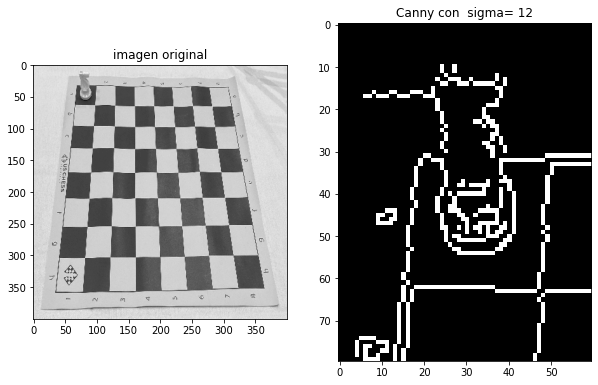

In [187]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from skimage import data

img = img_read('res/fb/img2.jpg', "gray")
#Leer imagen de entrada, darle tamaño 400x400 y recortarla entre 100 y 300
img1 = cv2.resize(img, (400,400))
img = img1[0:80,50:110].astype(np.uint8)

#Definir el sigma
sigma = 12

#Suavizamos la imagen para eliminar ruido (aplicar filtro Gaussiano)
result = cv2.GaussianBlur(img, (3,3), sigma)

#Aplicar el filtro de Canny como función de cv2 y darle límite entre 0 y 255
result = cv2.Canny(img, threshold1= 100, threshold2 = 180)

#Generar un subplot 1x2 que muestre imagen original y Canny
fig2, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img1, cmap='gray')
ax[1].set_title('Canny con  sigma= '+str(sigma))
ax[1].imshow(result, cmap='gray')

## <ul><li>Cierre</li></ul>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


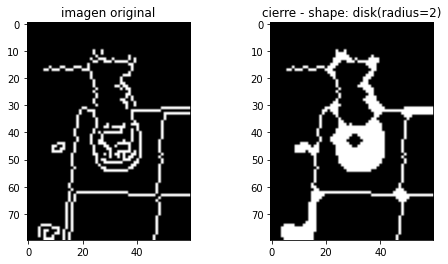

In [188]:
#Importar librerías
%matplotlib inline
from skimage import img_as_uint
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear máscara
radius = 2
selem = morph.disk(radius)

#Leer imagen de entrada y aplicar la operación cierre de skimage, cuyos parámetros
#requieren imagen de entrada y una máscara
cierre = morph.binary_closing(result,selem)

#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(result, cmap='gray')
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray')


io.imsave("res/pr.jpg", img_as_uint(cierre))

## <ul><li>Negativo de una imagen</li></ul>

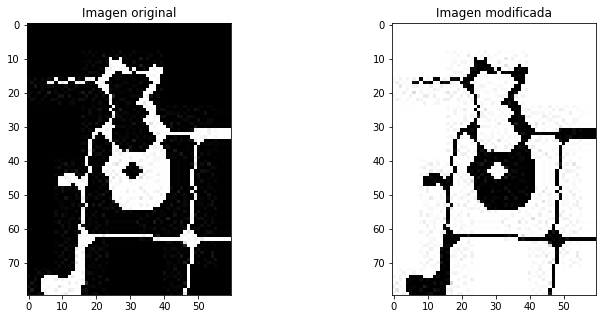

In [192]:
#Leer una imagen en escala de grises
img = cv2.imread('res/pr.jpg', cv2.IMREAD_GRAYSCALE)
#Crear la copia de la imagen
img_subtract= np.zeros(img.shape, np.uint8)
#El negativo de la imagen corresponde a restar de la matriz cuyas componentes son 255,
#la matriz de la imagen que cargamos
img_subtract = cv2.subtract(255, img)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('Imagen modificada')
ax[1].imshow(img_subtract, cmap="gray")

## <ul><li>Operadores lógicos (OR)</li></ul>

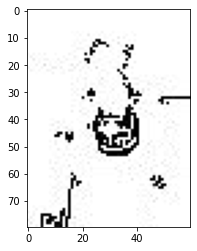

In [193]:
OR = cv2.bitwise_or(result,img_subtract)
plt.imshow(OR, cmap="gray")

## <ul><li>Apertura</li></ul>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


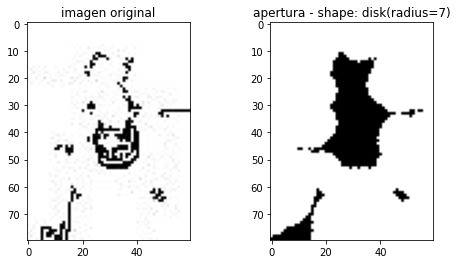

In [194]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Definir radio y crear una máscara
radius = 7

selem = morph.disk(radius)

#Leer imagen de entrada y realizar una apertura con la máscara creada bajo la función
#de skimage, los parámetros son los mismos que erosión y dilatación
apertura = morph.binary_opening(OR,selem)

#Crear subplot 1x2 que muestre imagen original y apertura 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(OR, cmap='gray')
ax2.set_title('apertura - shape: disk(radius='+str(radius)+')')
ax2.imshow(apertura, cmap='gray')

io.imsave("res/pr2.jpg", img_as_uint(apertura))

## <ul><li>Operadores lógicos (OR)</li></ul>

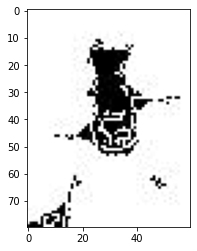

In [195]:
img = cv2.imread('res/pr2.jpg', cv2.IMREAD_GRAYSCALE)
OR = cv2.bitwise_or(result,img)
plt.imshow(OR, cmap="gray")

<b>NOTA:</b> Esta es la razón por la cual se dice que los metodos aplicados para este tipo de segmentación no son muy eficientes debido a que en algunos casos la imagen puede quedar mal segmentada.

## <ul><li>Filtro de Canny</li></ul>

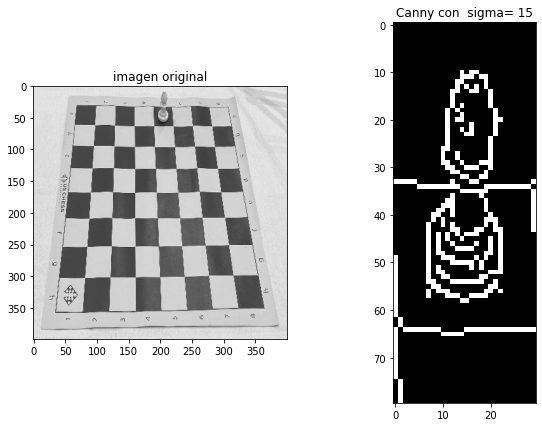

In [198]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math
import cv2
from skimage import data

img = img_read('res/fb/img3.jpg', "gray")
#Leer imagen de entrada, darle tamaño 400x400 y recortarla entre 100 y 300
img1 = cv2.resize(img, (400,400))
img = img1[0:80,190:220].astype(np.uint8)

#Definir el sigma
sigma = 15

#Suavizamos la imagen para eliminar ruido (aplicar filtro Gaussiano)
result = cv2.GaussianBlur(img, (3,3), sigma)

#Aplicar el filtro de Canny como función de cv2 y darle límite entre 0 y 255
result = cv2.Canny(img, threshold1= 100, threshold2 = 180)

#Generar un subplot 1x2 que muestre imagen original y Canny
fig2, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img1, cmap='gray')
ax[1].set_title('Canny con  sigma= '+str(sigma))
ax[1].imshow(result, cmap='gray')

## <ul><li>Cierre</li></ul>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


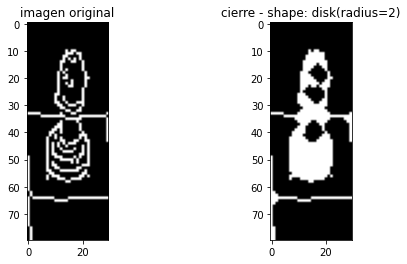

In [199]:
#Importar librerías
%matplotlib inline
from skimage import img_as_uint
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Crear máscara
radius = 2
selem = morph.disk(radius)

#Leer imagen de entrada y aplicar la operación cierre de skimage, cuyos parámetros
#requieren imagen de entrada y una máscara
cierre = morph.binary_closing(result,selem)

#Crear subplot 1x2 que muestre imagen original e imagen bajo cierre
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(result, cmap='gray')
ax2.set_title('cierre - shape: disk(radius='+str(radius)+')')
ax2.imshow(cierre, cmap='gray')


io.imsave("res/pr.jpg", img_as_uint(cierre))

## <ul><li>Negativo de la imagen</li></ul>

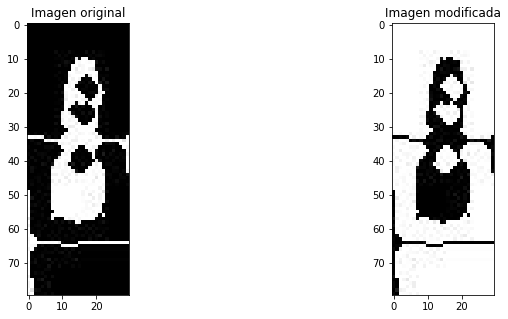

In [200]:
#Leer una imagen en escala de grises
img = cv2.imread('res/pr.jpg', cv2.IMREAD_GRAYSCALE)
#Crear la copia de la imagen
img_subtract= np.zeros(img.shape, np.uint8)
#El negativo de la imagen corresponde a restar de la matriz cuyas componentes son 255,
#la matriz de la imagen que cargamos
img_subtract = cv2.subtract(255, img)

fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].set_title('Imagen original')
ax[0].imshow(img, cmap="gray")
ax[1].set_title('Imagen modificada')
ax[1].imshow(img_subtract, cmap="gray")

## <ul><li>Operadores lógicos (OR)</li></ul>

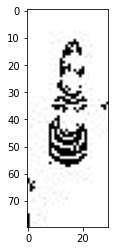

In [202]:
OR = cv2.bitwise_or(result,img_subtract)
plt.imshow(OR, cmap="gray")

## <ul><li>Apertura</li></ul>

Lossy conversion from uint16 to uint8. Losing 8 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


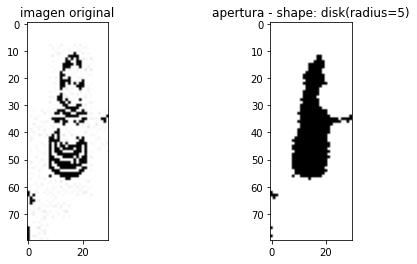

In [78]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import skimage.morphology as morph

#Definir radio y crear una máscara
radius = 5

selem = morph.disk(radius)

#Leer imagen de entrada y realizar una apertura con la máscara creada bajo la función
#de skimage, los parámetros son los mismos que erosión y dilatación
apertura = morph.binary_opening(AND,selem)

#Crear subplot 1x2 que muestre imagen original y apertura 
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
ax1.set_title('imagen original')
ax1.imshow(AND, cmap='gray')
ax2.set_title('apertura - shape: disk(radius='+str(radius)+')')
ax2.imshow(apertura, cmap='gray')

io.imsave("res/pr2.jpg", img_as_uint(apertura))

## <ul><li>Operadores lógicos (OR)</li></ul>

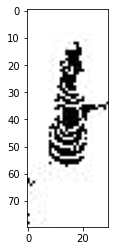

In [79]:
img = cv2.imread('res/pr2.jpg', cv2.IMREAD_GRAYSCALE)
OR = cv2.bitwise_or(result,img)
plt.imshow(OR, cmap="gray")

# <center>METODOLOGIA - FICHA BLANCA (VARIAS)</center>

En este caso de igual forma todas las fichas blancas poseen casi las mismas caracteristicas por lo general, por lo que se decidio aplicar los mismo pasos que se realizaron cuando se intento segmentar solo una ficha, por lo que se llego a lo siguiente.

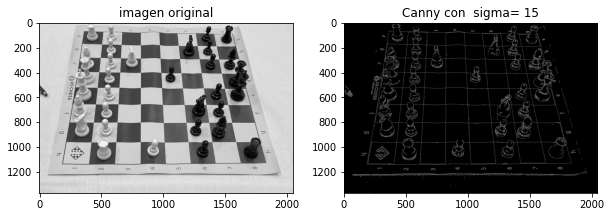

In [205]:
img = img_read('res/fb/img4.jpg', "gray")

#Definir el sigma
sigma = 15

#Suavizamos la imagen para eliminar ruido (aplicar filtro Gaussiano)
result = cv2.GaussianBlur(img, (3,3), sigma)

#Aplicar el filtro de Canny como función de cv2 y darle límite entre 0 y 255
result = cv2.Canny(img, threshold1= 100, threshold2 = 180)

#Generar un subplot 1x2 que muestre imagen original y Canny
fig2, ax = plt.subplots(1,2, figsize=(10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Canny con  sigma= '+str(sigma))
ax[1].imshow(result, cmap='gray')

Aquí es donde se complica la situación, debido a que anteriormente cuando se segmento solo una ficha blanca se podian ajustar los datos únicamente a una sola ficha, pero en este caso se tiene que tener en cuenta las demás fichas blancas y además de eso, se deben de quitar las fichas negras que de igual forma se le resaltaron los bordes después de implementar el canny, por lo que este método ya no funcionaría, y después de muchos intentos resulto muy dificíl encontrar otro método que nos ayudara en esta situación con los conocimiento que tenemos del curso.

# <center>APLICACIÓN A LAS OTRAS IMAGENES</center>

Como la idea es trabajar con todas las imagenes escogidas, se les va aplicar los metodos anteriormente mencionados con la misma secuencia de pasos de forma resumida para concluir que los metodos son efectivos en varios ambitos.

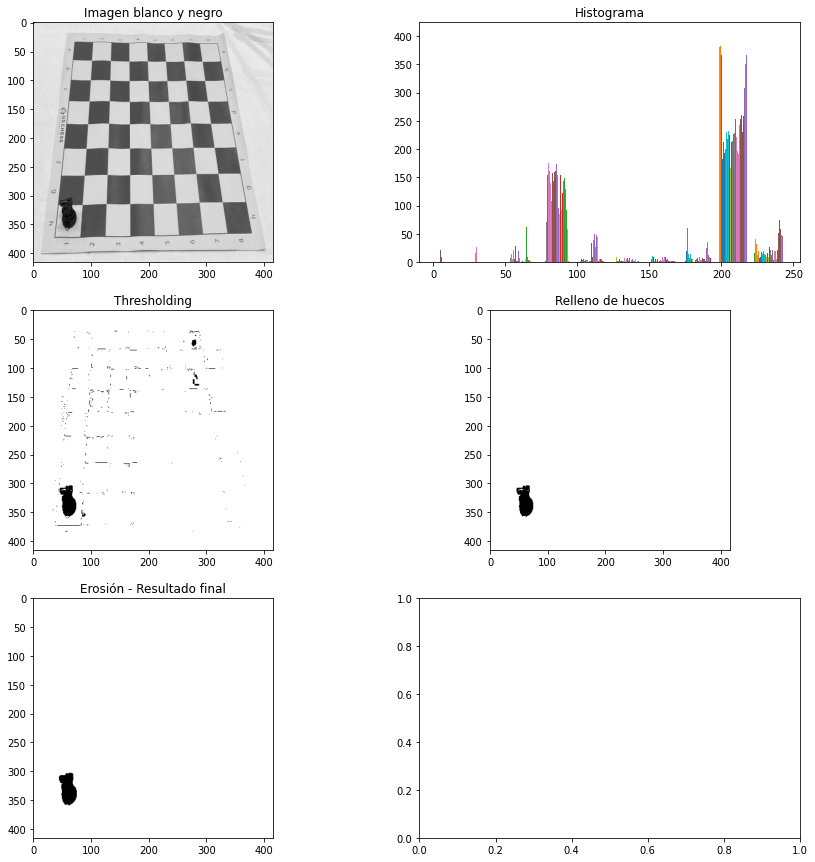

In [212]:
#Leer imagen de entrada 
img4_gray = img_read('res/fn/img3.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 70
thresholded = img4_gray > 70

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=1000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img4_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img4_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

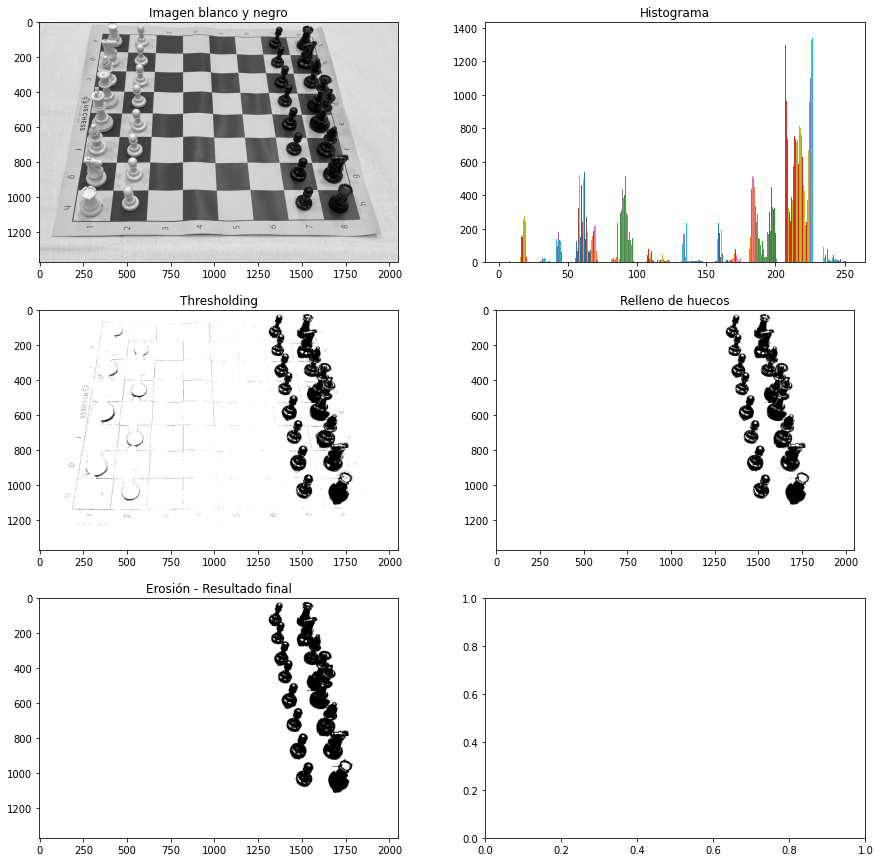

In [217]:
#Leer imagen de entrada 
img5_gray = img_read('res/fn/img5.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 50
thresholded = img5_gray > 50

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img5_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img5_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

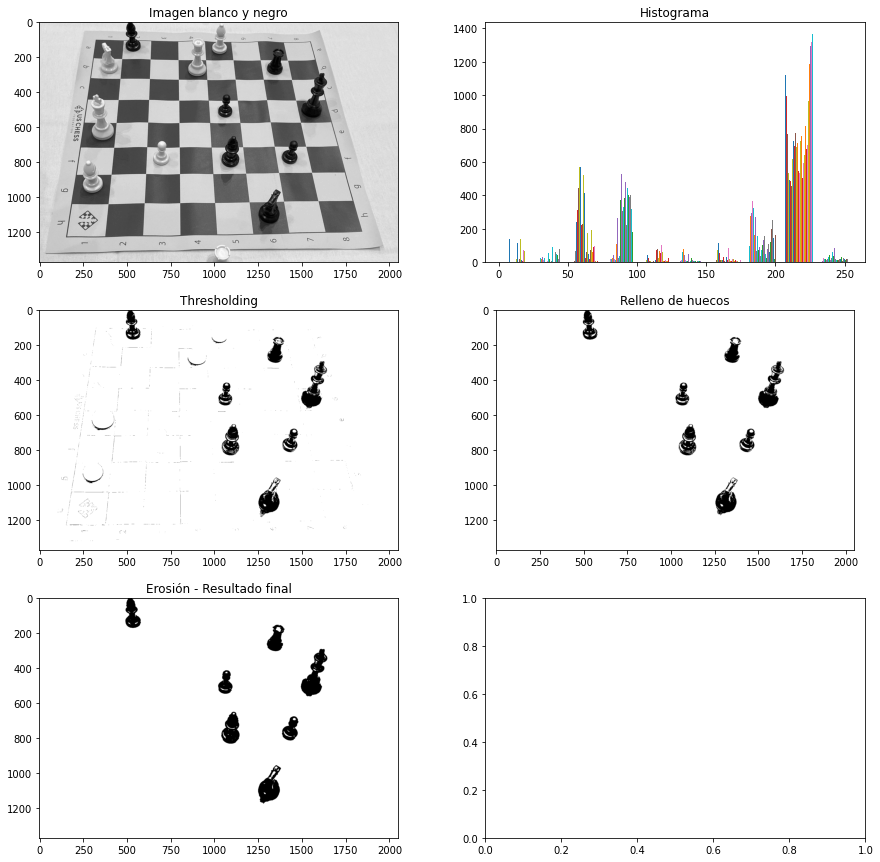

In [222]:
#Leer imagen de entrada 
img6_gray = img_read('res/fn/img6.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img6_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(2)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img6_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img6_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

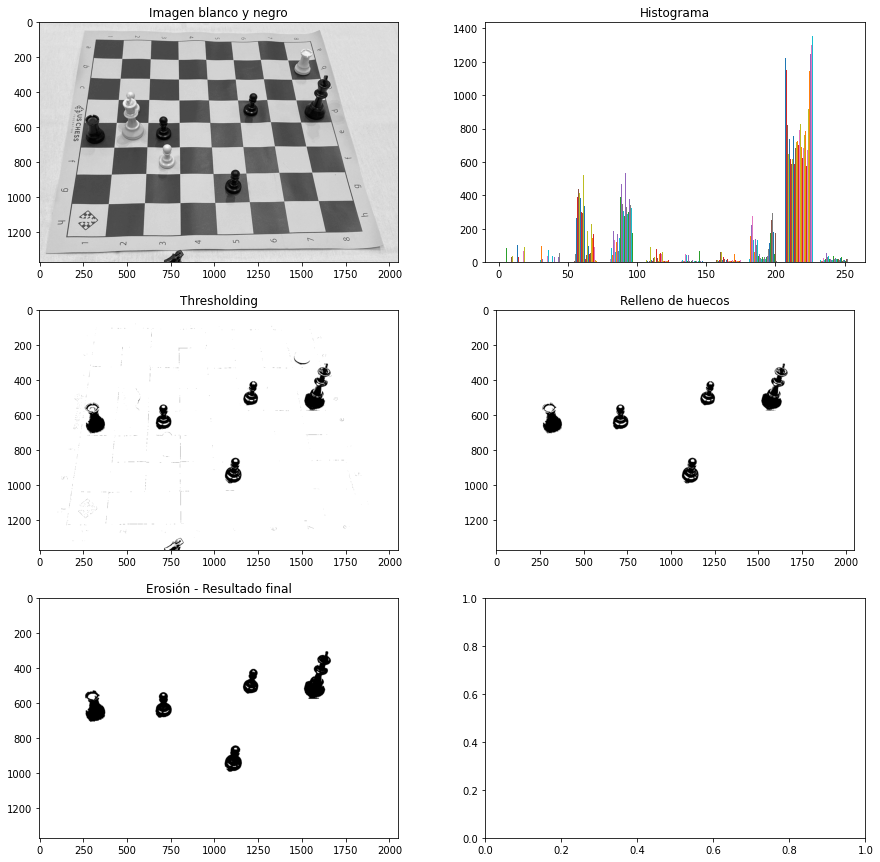

In [224]:
#Leer imagen de entrada 
img7_gray = img_read('res/fn/img7.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img7_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(2)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img7_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img7_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

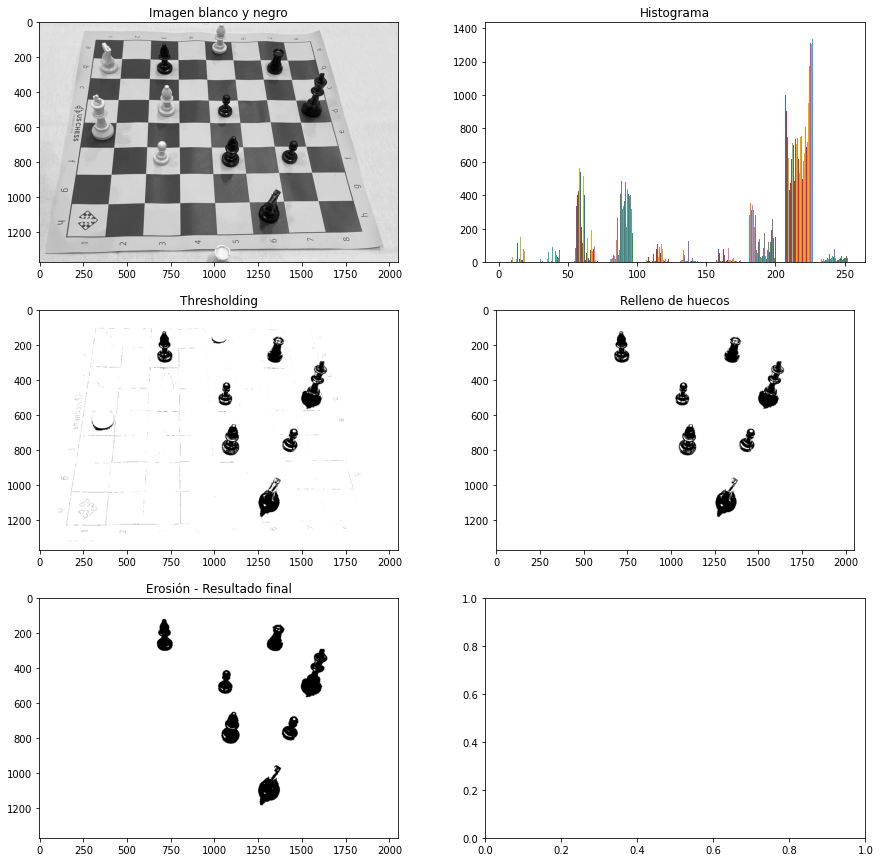

In [227]:
#Leer imagen de entrada 
img8_gray = img_read('res/fn/img8.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 50
thresholded = img8_gray > 50

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(2)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img8_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img8_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

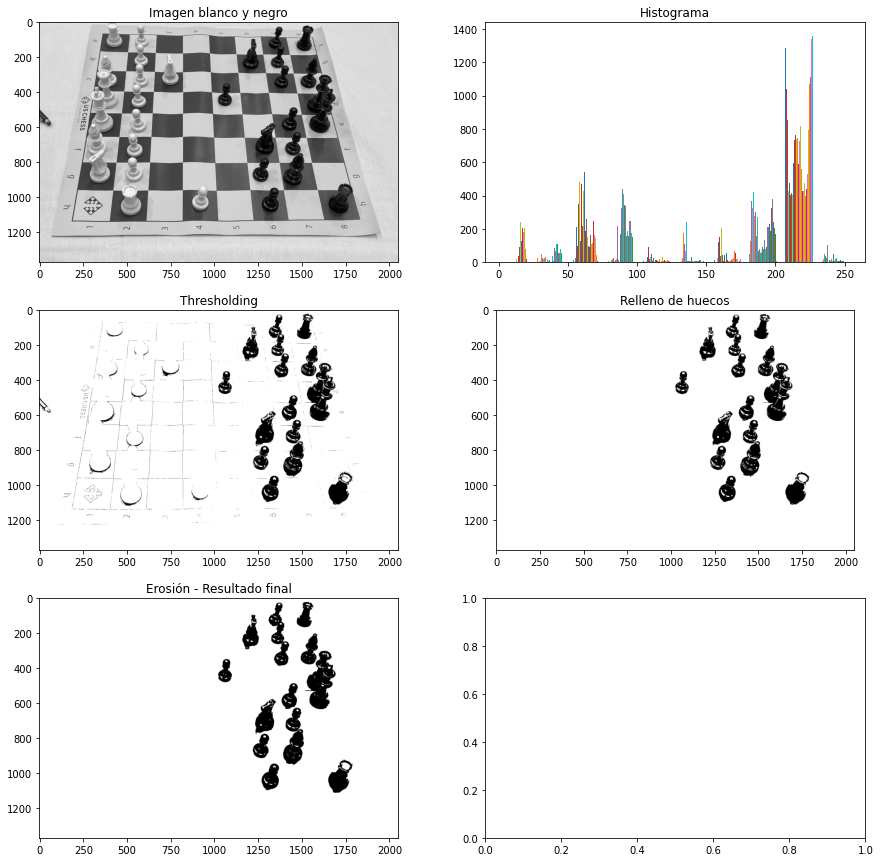

In [230]:
#Leer imagen de entrada 
img4_gray = img_read('res/fb/img4.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 50
thresholded = img4_gray > 50

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img4_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img4_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

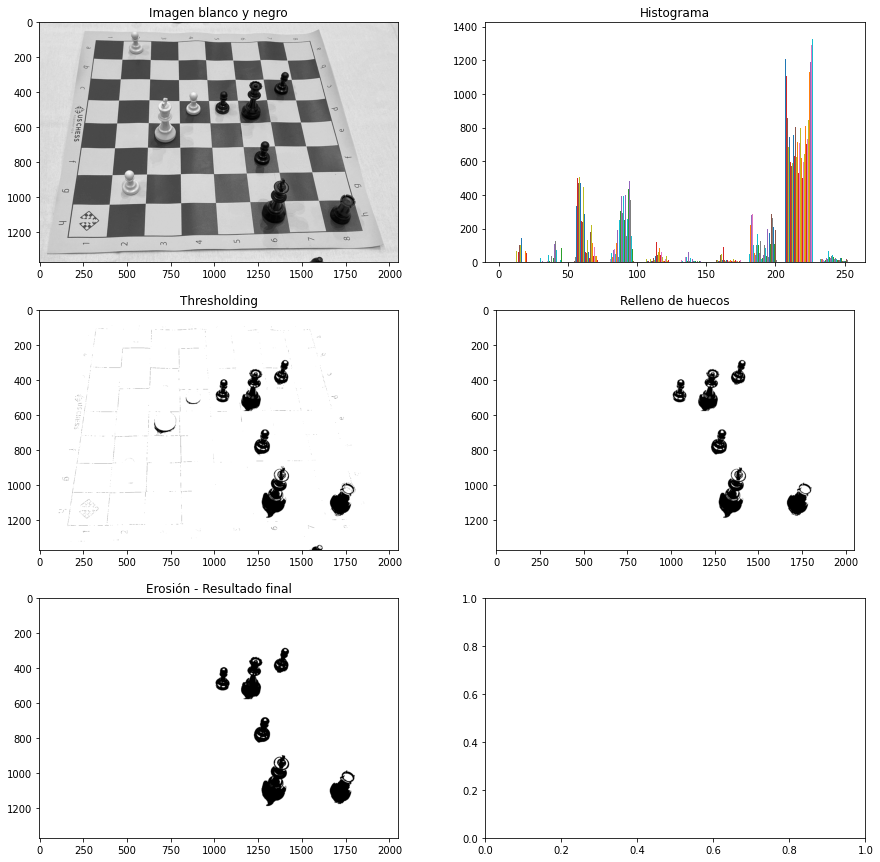

In [232]:
#Leer imagen de entrada 
img5_gray = img_read('res/fb/img5.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 50
thresholded = img5_gray > 50

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img5_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img5_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

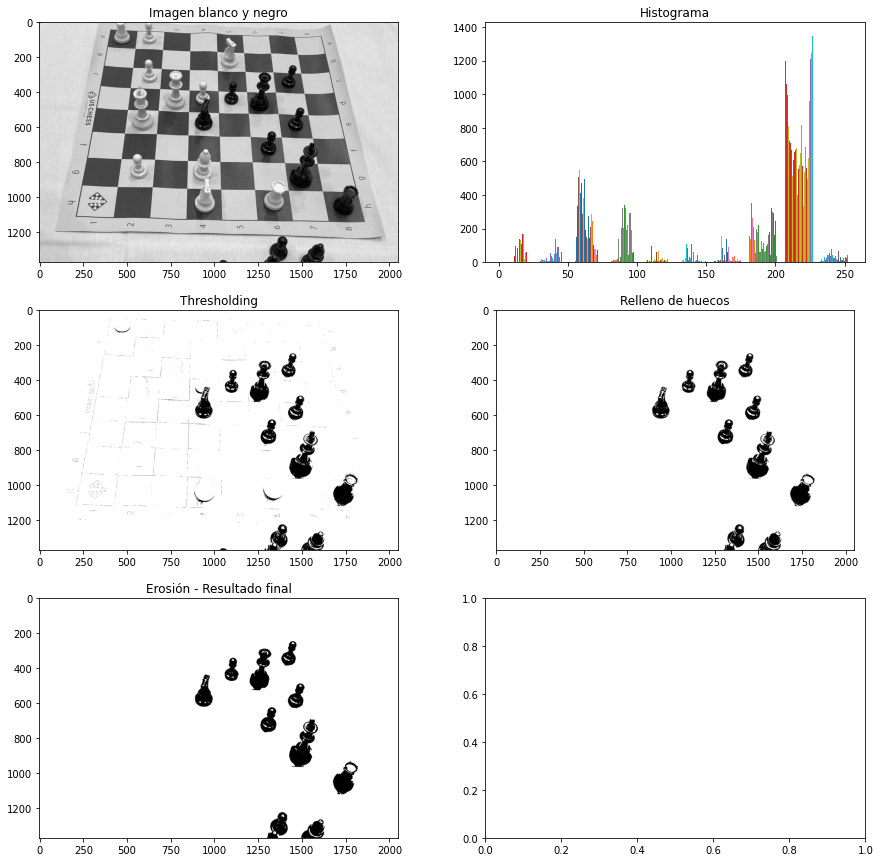

In [235]:
#Leer imagen de entrada 
img6_gray = img_read('res/fb/img6.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img6_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img6_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img6_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

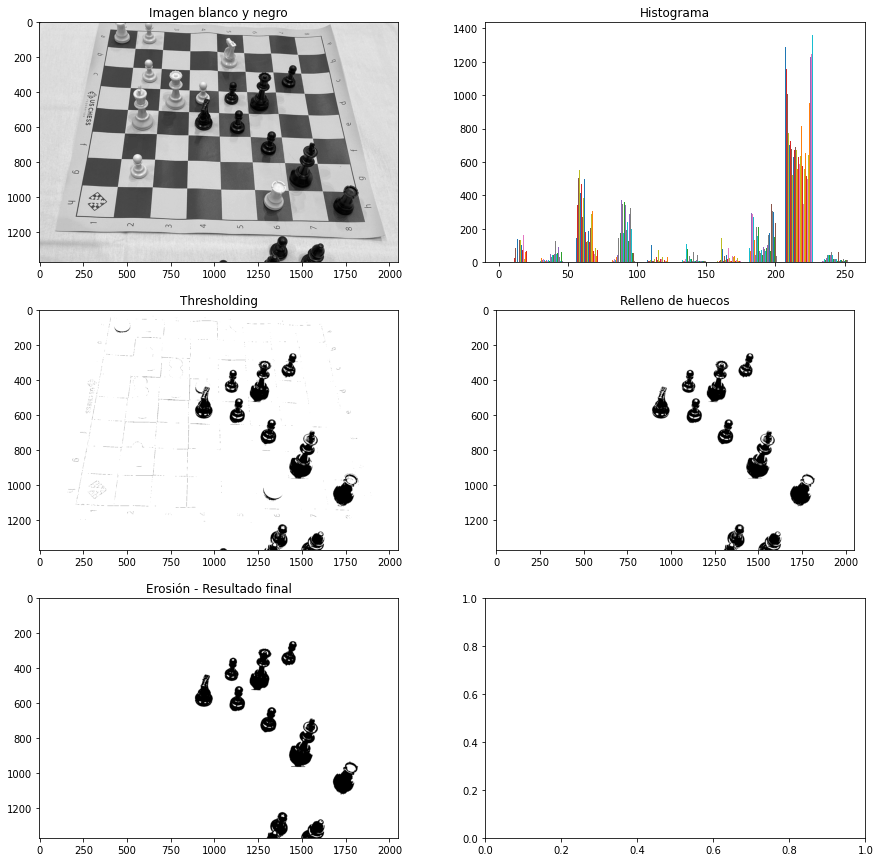

In [237]:
#Leer imagen de entrada 
img7_gray = img_read('res/fb/img7.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img7_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=2000)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img7_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img7_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

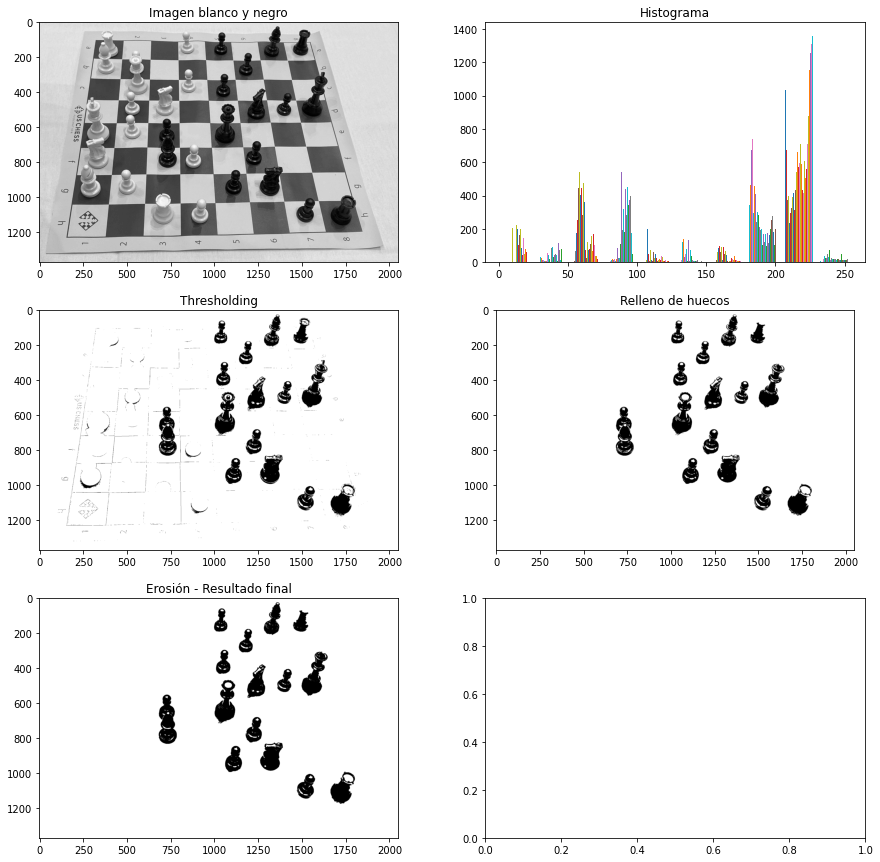

In [241]:
#Leer imagen de entrada 
img8_gray = img_read('res/fb/img8.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img8_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=1700)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img8_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img8_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

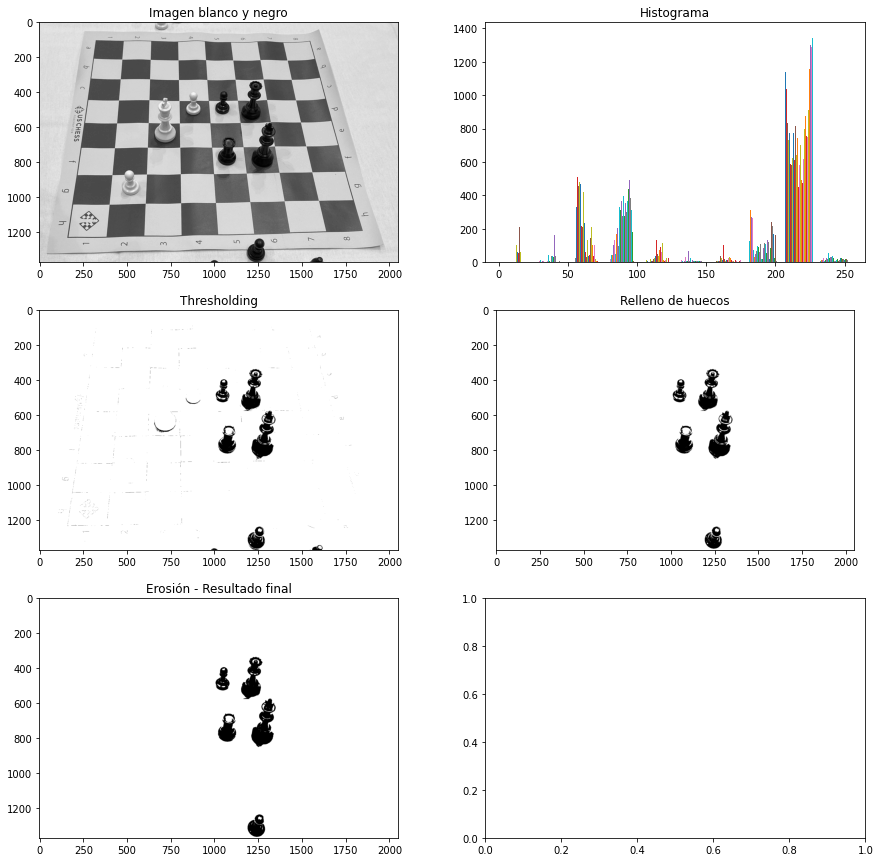

In [244]:
#Leer imagen de entrada 
img9_gray = img_read('res/fn/img9.jpg',"gray").astype(np.uint8)

#Thresholding
#Tomar solamente los valores de la imagen mayores a 45
thresholded = img9_gray > 45

#Relleno de huecos
filled = morph.remove_small_holes(thresholded,area_threshold=1700)

#Erosion
elem = morph.disk(1)
erosion = morph.binary_erosion(filled,elem)

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 15))

#Se le dan títulos a los cuadros, se imprimen las imágenes y sus histogramas
arreglo_plots[0,0].set_title('Imagen blanco y negro')
arreglo_plots[0,0].imshow(img9_gray, cmap="gray")
arreglo_plots[0,1].set_title('Histograma')
arreglo_plots[0,1].hist(img9_gray);

arreglo_plots[1,0].set_title('Thresholding')
arreglo_plots[1,0].imshow(thresholded, cmap="gray")
arreglo_plots[1,1].set_title('Relleno de huecos')
arreglo_plots[1,1].imshow(filled, cmap="gray")

arreglo_plots[2,0].set_title('Erosión - Resultado final')
arreglo_plots[2,0].imshow(erosion, cmap="gray")

# <center>CONCLUSIONES</center>

Al final de este proyecto, se puede concluir que gracias a los métodos aprendidos en clase se logró para este dataset la segmentación con un éxito parcial de las fichas de ajedrez negras, el cual se debe a que el color negro es predominante en cuento a intensidad se trata dentro de las imágenes del dataset. En cuanto a las fichas blancas la dificultad para la segmentación de las mismas aumentó significativamente ya que el color blanco del tablero era casi el mismo, por lo que se aplicaron diversos métodos aprendidos en clase, pero el éxito en cuanto a la segmentación de las fichas blancas no fue de un 100%, sin embargo si se logró demostrar que es posible luego de diferentes procesos no secuenciales en cada ficha, es decir, no se encontró un patrón o conjunto de pasos a seguir para la segmentación, en cambio se puede llegar a la segmentación con un conjunto de pasos diferentes para cada ficha, fue de esta forma como se abordó la parte más dificil de este proyecto, debido a que el grado de dificultad aunmentó enormemente con lás fichas blancas en general, por lo que se puede responder:

## <ul><li>¿Es posible separar una ficha negra del tablero?</li></ul>

Si es posible separar una ficha negra del tablero de ajedrez sin tener la necesidad de aplicarle un preprocesamiento a la imagen, debido a que el dataset nos brinda imagenes que no tienen ningun impedimento al momento de aplicar las técnicas propuestas anteriormente, impedimentos como lo puede ser el ruido, la alta o baja iluminación, la calidad de la imagen en cuanto a pixeles, entre otras.

## <ul><li>¿Es posible separar varias fichas negras del tablero?</li></ul>

Si es posible separar varias fichas negras del tablero ya que siguen siendo las mismas caracteristicas que se presentaron al momento de separar una única ficha negra. Tal caracteristica corresponde a la intensidad de color negro que tiene y que el entorno no posee, por lo que de manera sencilla se puede segmentar varias fichas de este tipo con las mismas condiciones que se propusieron cuando se segmento una sola, sin necesidad de aplicarle preprocesamiento a la imagen.

## <ul><li>¿Es posible separar una ficha blanca del tablero?</li></ul>

Fue posible el separa una ficha blanca del tablero pero se admite que no fue de una forma muy eficiente, ya que después de todo al final la imagen pierde mucha información por las diversas técnicas que se utilizaron por lo que se imagina que existe algún método más eficiente al momento de segmentarla pero lamentablemente no se pudo encontrar tan fácilmente.

## <ul><li>¿Es posible separar una ficha blanca del tablero?</li></ul>

Fue posible el separa una ficha blanca del tablero pero se admite que no fue de una forma muy eficiente, ya que después de todo al final la imagen pierde mucha información por las diversas técnicas que se utilizaron por lo que se imagina que existe algún método más eficiente al momento de segmentarla pero lamentablemente no se pudo encontrar tan fácilmente.

## <ul><li>¿Es posible separar varias fichas blancas del tablero?</li></ul>

No fue posible separa varias fichas blancas del tablero ya que como se concluyo en la anterior pregunta, el segmentar únicamente una ficha fue una tarea bastante díficil y aun así se logro de forma no tan eficiente, por lo que el segmentar muchas más fichas con estas caracteriscas y combinadas con las fichas negras, resulto ser una tarea mucho más complicada por lo que lamentablemente no se llego al objetivo.